Codveda Internship Task 2: Exploratory Data Analysis (EDA)


In this notebook, I performed an Exploratory Data Analysis on the Iris flower dataset, which contains measurements of sepal and petal features from three iris species: setosa, versicolor, and virginica.

The objective is to understand the structure, patterns, and relationships within the data using:

- Summary statistics (mean, median, mode, standard deviation)
- Visualizations (histogram, boxplot, scatter plot)
- Correlation analysis between numerical features

I used Python, pandas, matplotlib, and seaborn to complete this task.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Get summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Get class distribution
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# Median and mode only for numeric columns
numeric_cols = df.select_dtypes(include='number')

# Median
print("Median:\n", numeric_cols.median())

# Mode (works for all columns, but you can limit it too)
print("Mode:\n", df.mode().iloc[0])

Median:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64
Mode:
 sepal_length       5.0
sepal_width        3.0
petal_length       1.5
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Clean column names (remove spaces and quotes)
df.columns = df.columns.str.strip().str.replace('"', '')

In [12]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
print(df.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


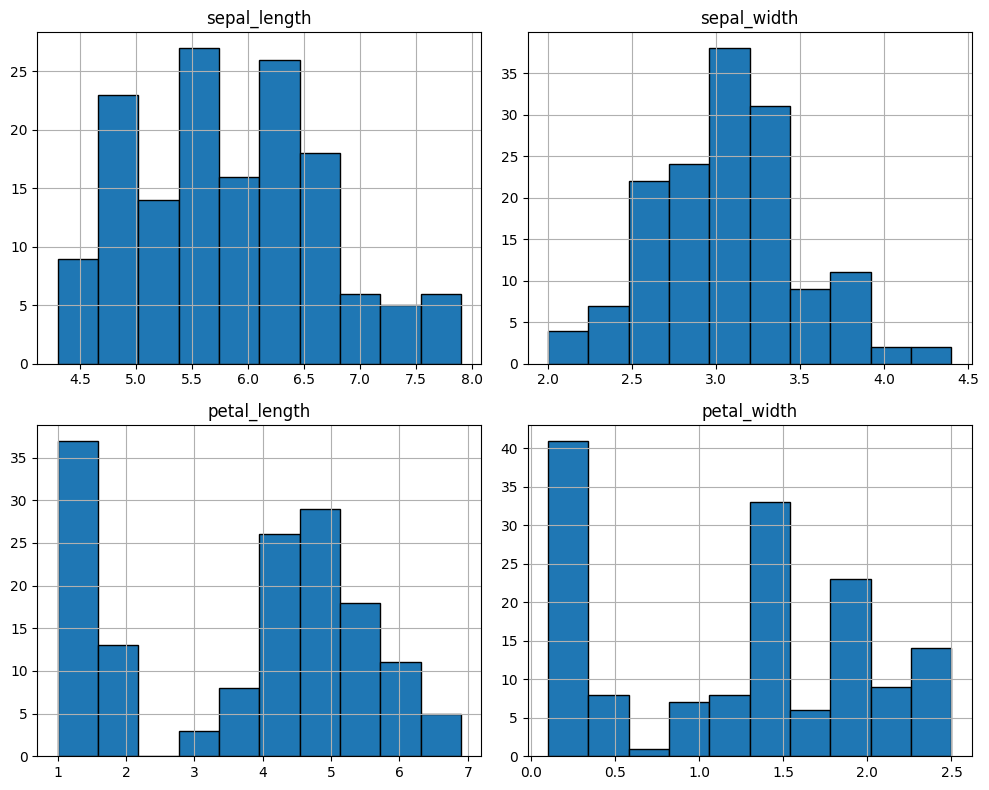

In [30]:
# Visualizing feature distributions using histograms
import matplotlib.pyplot as plt
df.hist(figsize=(10,8), edgecolor='black')
plt.tight_layout()
plt.savefig("histogram.png")
plt.show()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt  # (if not already imported)

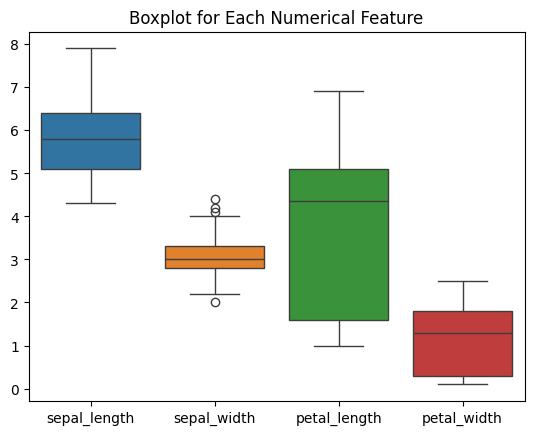

In [31]:
# Showing spread and outliers in each numerical feature
sns.boxplot(data=df)
plt.title("Boxplot for Each Numerical Feature")
plt.savefig("boxplot.png")
plt.show()

Boxplots give us insight into the spread, median, and any outliers present in the data.


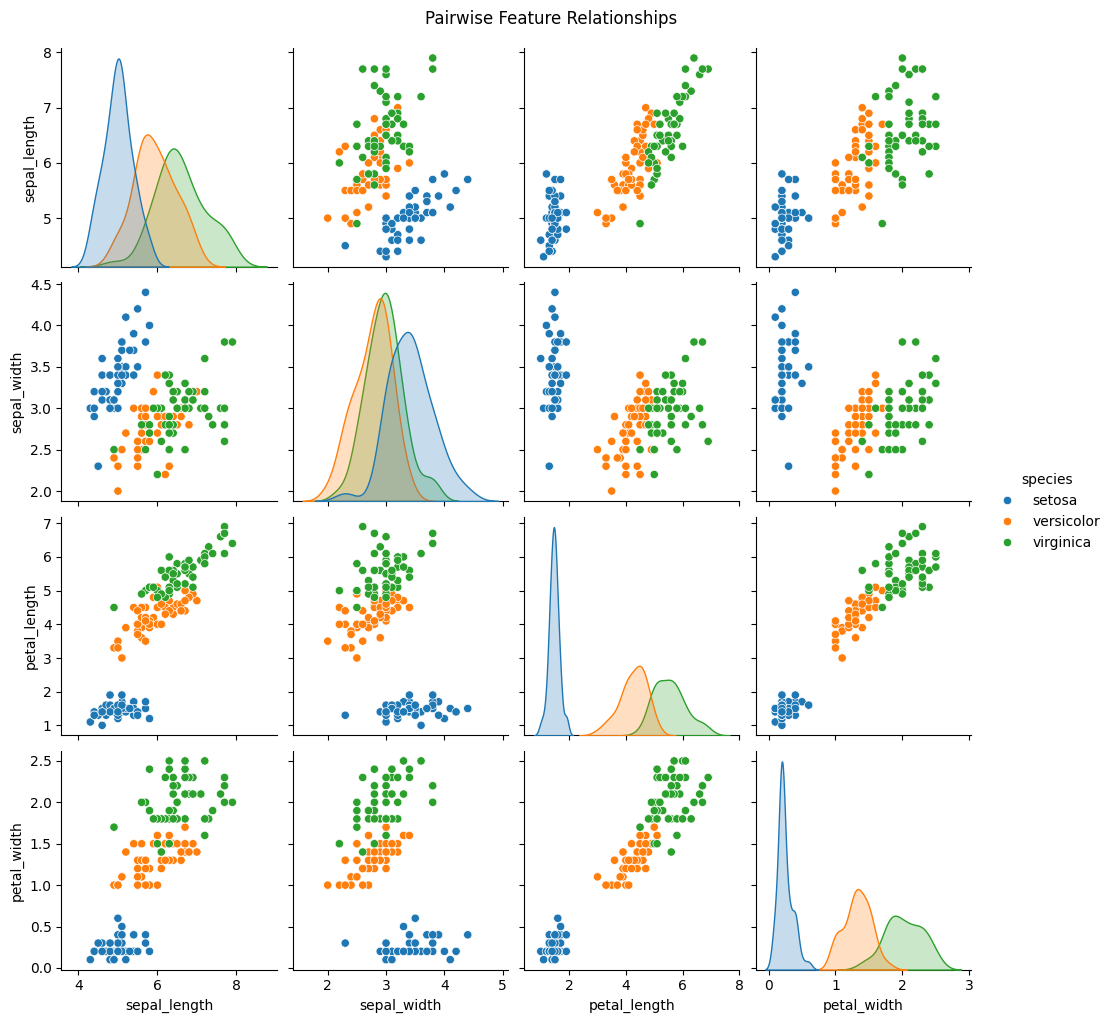

In [32]:
# Showing pairwise relationships, colored by species
sns.pairplot(df, hue="species")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.savefig("pairwise features plot.png")
plt.show()

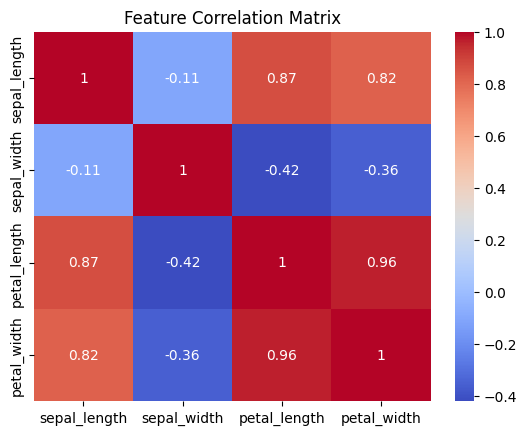

In [33]:
# Calculating correlation matrix
corr = df.drop('species', axis=1).corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.savefig("feature correlation matrix plot.png")
plt.show()

In [34]:
# Checking average measurements for each species
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
